# Regression Example: Used Car Price Prediction

<img src="mlproblems.png" alt="ML Algorithms" width="800"/>

Regression analysis is a set of ML algorithms for estimating the relationships between a dependent (continuous) variable (also called the 'outcome' or 'response' variable) and one or more independent variables (often called 'predictors', or 'features').

Source: https://en.wikipedia.org/wiki/Regression_analysis

Other References:

https://hbr.org/2015/11/a-refresher-on-regression-analysis

### Loading the Dataset

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [59]:
cars_df = pd.read_csv( "../EDA/new_used_car.csv" )

In [60]:
cars_df.sample(5)

,Location,Fuel_Type,Transmission,Owner_Type,Seats,Price,age,make,model,mileage_new,engine_new,power_new,KM_Driven
2808,Mumbai,Diesel,Manual,Second,5.0,4.50,8,maruti,swift,23.40,1248.0,74.00,80
364,Coimbatore,Petrol,Automatic,Second,5.0,5.08,6,hyundai,i10,16.95,1197.0,78.90,41
712,Chennai,Petrol,Automatic,Second,5.0,4.25,4,maruti,celerio,23.10,998.0,67.04,12
1936,Pune,Diesel,Manual,Second,7.0,5.90,8,maruti,ertiga,20.77,1248.0,88.76,105
1276,Bangalore,Petrol,Manual,Second,5.0,4.35,7,honda,amaze,18.00,1198.0,86.70,44


In [61]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3064 entries, 0 to 3063
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Location      3064 non-null   object 
 1   Fuel_Type     3064 non-null   object 
 2   Transmission  3064 non-null   object 
 3   Owner_Type    3064 non-null   object 
 4   Seats         3063 non-null   float64
 5   Price         3064 non-null   float64
 6   age           3064 non-null   int64  
 7   make          3064 non-null   object 
 8   model         3064 non-null   object 
 9   mileage_new   3064 non-null   float64
 10  engine_new    3064 non-null   float64
 11  power_new     3064 non-null   float64
 12  KM_Driven     3064 non-null   int64  
dtypes: float64(5), int64(2), object(6)
memory usage: 311.3+ KB


## Building a simple linear regression model

Assumes linear relationship between features and outcome variable.

### Setting X and Y Variables

In [62]:
X = pd.DataFrame(cars_df['KM_Driven'])
y = cars_df['Price']

### Splitting the dataset

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    train_size = 0.8,
                                                    random_state = 80)

In [65]:
X_train.shape

(2451, 1)

In [66]:
X_test.shape

(613, 1)

### Observing the relationship

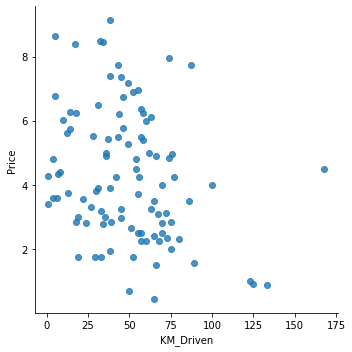

In [67]:
sn.lmplot( data = cars_df.sample(100),
           x = 'KM_Driven',
           y = 'Price',
           fit_reg = False);

### Building the model

In [68]:
from sklearn.linear_model import LinearRegression

In [69]:
lreg_v1 = LinearRegression()
lreg_v1.fit(X_train, y_train)

LinearRegression()

#### Finding the model parameters

In [70]:
lreg_v1.intercept_

5.423661343838146

In [71]:
lreg_v1.coef_

array([-0.02004083])

### Predicting on test set and evaluation model performance

In [72]:
y_pred = lreg_v1.predict(X_test)

In [73]:
y_df = pd.DataFrame({"actual": y_test,
                     "predicted": y_pred,
                     "residual": y_pred - y_test})

In [74]:
y_df.sample(10, random_state = 100)

,actual,predicted,residual
1685,4.25,4.281334,0.031334
773,3.24,4.762314,1.522314
385,5.25,4.682151,-0.567849
2556,2.85,5.062926,2.212926
1525,3.49,4.822437,1.332437
2927,3.99,4.121008,0.131008
1152,5.00,3.980722,-1.019278
1194,5.92,5.022845,-0.897155
1115,2.35,4.501783,2.151783
925,2.00,4.020803,2.020803


#### What is R-quared?
https://www.investopedia.com/terms/r/r-squared.asp

In [75]:
from sklearn.metrics import r2_score

In [76]:
r2_score(y_test, y_pred)

0.10299425947820684

### Participants Exercise: 1

Build a model by adding the following four parameters and measure accuracy

- mileage_new 
- engine_new 
- power_new
- KM_Driven

## Building model with all required variables (Multiple Linear Regression)

### Feature Set Selection

In [77]:
list(cars_df.columns)

['Location',
 'Fuel_Type',
 'Transmission',
 'Owner_Type',
 'Seats',
 'Price',
 'age',
 'make',
 'model',
 'mileage_new',
 'engine_new',
 'power_new',
 'KM_Driven']

In [78]:
x_features = ['KM_Driven', 'Fuel_Type', 'age',
              'Transmission', 'Owner_Type', 'Seats', 
              'make', 'mileage_new', 'engine_new', 
              'power_new', 'Location']

In [79]:
cat_features = ['Fuel_Type', 
                'Transmission', 'Owner_Type',
                'make', 'Location']

In [80]:
num_features = list(set(x_features) - set(cat_features))

In [81]:
num_features

['power_new', 'mileage_new', 'engine_new', 'KM_Driven', 'Seats', 'age']

In [82]:
cars_df[x_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3064 entries, 0 to 3063
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   KM_Driven     3064 non-null   int64  
 1   Fuel_Type     3064 non-null   object 
 2   age           3064 non-null   int64  
 3   Transmission  3064 non-null   object 
 4   Owner_Type    3064 non-null   object 
 5   Seats         3063 non-null   float64
 6   make          3064 non-null   object 
 7   mileage_new   3064 non-null   float64
 8   engine_new    3064 non-null   float64
 9   power_new     3064 non-null   float64
 10  Location      3064 non-null   object 
dtypes: float64(4), int64(2), object(5)
memory usage: 263.4+ KB


### Dropping Null Values

In [83]:
cars_df = cars_df[x_features + ['Price']].dropna()

In [84]:
cars_df.shape

(3063, 12)

In [85]:
cars_df.sample(10)

,KM_Driven,Fuel_Type,age,Transmission,Owner_Type,Seats,make,mileage_new,engine_new,power_new,Location,Price
1218,25,Petrol,6,Manual,Second,5.0,maruti,18.50,1197.0,85.80,Pune,3.50
1591,57,Petrol,6,Manual,First,5.0,maruti,19.10,1197.0,85.80,Coimbatore,6.69
200,37,Diesel,7,Manual,First,5.0,toyota,23.59,1364.0,67.04,Bangalore,5.75
846,11,Petrol,4,Manual,First,5.0,maruti,18.50,1197.0,85.80,Mumbai,3.95
1373,38,Diesel,3,Manual,First,5.0,maruti,24.30,1248.0,88.50,Kochi,9.13
2978,81,Petrol,15,Manual,Second,5.0,maruti,15.90,1298.0,85.00,Ahmedabad,0.75
2900,79,Diesel,8,Manual,First,5.0,ford,17.80,1399.0,67.00,Kochi,3.16
810,79,Diesel,10,Manual,First,5.0,maruti,21.10,1248.0,73.90,Hyderabad,3.40
1531,65,Diesel,7,Manual,First,5.0,maruti,23.20,1248.0,73.94,Jaipur,3.75
775,63,Diesel,7,Manual,First,7.0,mahindra,15.96,2523.0,62.10,Jaipur,5.50


### Encoding Categorical Variables

OHE: One Hot Encoding

https://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/

In [86]:
encoded_cars_df = pd.get_dummies(cars_df[x_features], 
                                 columns=cat_features)

In [87]:
encoded_cars_df.sample(5)

,KM_Driven,age,Seats,mileage_new,engine_new,power_new,Fuel_Type_Diesel,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,...,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune
1654,9,4,5.0,18.90,1197.0,82.0,0,1,1,0,...,0,0,0,0,0,0,0,0,1,0
2652,75,7,7.0,20.77,1248.0,88.8,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
639,63,7,5.0,18.50,1197.0,82.9,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0
1317,19,5,4.0,25.40,624.0,37.5,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
1393,82,6,5.0,23.00,1396.0,90.0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [88]:
encoded_cars_df.columns

Index(['KM_Driven', 'age', 'Seats', 'mileage_new', 'engine_new', 'power_new',
       'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Transmission_Automatic',
       'Transmission_Manual', 'Owner_Type_First', 'Owner_Type_Fourth & Above',
       'Owner_Type_Second', 'Owner_Type_Third', 'make_ambassador',
       'make_chevrolet', 'make_datsun', 'make_fiat', 'make_ford', 'make_honda',
       'make_hyundai', 'make_mahindra', 'make_maruti', 'make_mitsubishi',
       'make_nissan', 'make_renault', 'make_skoda', 'make_tata', 'make_toyota',
       'make_volkswagen', 'Location_Ahmedabad', 'Location_Bangalore',
       'Location_Chennai', 'Location_Coimbatore', 'Location_Delhi',
       'Location_Hyderabad', 'Location_Jaipur', 'Location_Kochi',
       'Location_Kolkata', 'Location_Mumbai', 'Location_Pune'],
      dtype='object')

In [89]:
encoded_cars_df.shape

(3063, 41)

### Setting X and y variables

In [90]:
X = encoded_cars_df
y = cars_df['Price']

### Data Splitting

In [91]:
from sklearn.model_selection import train_test_split

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    train_size = 0.8,
                                                    random_state = 80)

In [93]:
X_train.shape

(2450, 41)

In [94]:
X_test.shape

(613, 41)

### Multiple Linear Regression Models

In [95]:
from sklearn.linear_model import LinearRegression

In [96]:
lreg_v1 = LinearRegression()

In [97]:
lreg_v1.fit(X_train, y_train)

LinearRegression()

### Understanding model parameters

In [98]:
lreg_v1.intercept_

1.5057285766843322

In [99]:
lreg_v1.coef_

array([-1.13136130e-02, -3.20488739e-01,  1.53351467e-01, -2.17807208e-02,
        7.37548568e-04,  5.15996478e-02,  4.89049580e-01, -4.89049580e-01,
        1.45127512e-01, -1.45127512e-01,  2.40689497e-01, -7.29365391e-01,
        6.08551257e-02,  4.27820768e-01, -2.27595720e-15, -5.63365216e-01,
       -8.15014411e-01, -4.92909840e-01,  1.14280989e-01, -9.50701227e-03,
        2.48687680e-01, -3.70986026e-01,  7.90286575e-01, -5.55111512e-17,
        6.18488670e-02,  1.87009173e-01,  2.77660787e-01, -7.73329715e-01,
        1.03371479e+00,  3.11623360e-01, -1.41859530e-01,  5.12045781e-01,
        4.14193425e-02,  8.12762314e-01, -4.29798906e-01,  3.99523035e-01,
       -1.92318865e-02,  2.53134679e-01, -1.05490409e+00, -2.51393680e-01,
       -1.21697060e-01])

In [100]:
dict(zip(X_train.columns, 
         np.round(lreg_v1.coef_, 3)))

{'KM_Driven': -0.011,
 'age': -0.32,
 'Seats': 0.153,
 'mileage_new': -0.022,
 'engine_new': 0.001,
 'power_new': 0.052,
 'Fuel_Type_Diesel': 0.489,
 'Fuel_Type_Petrol': -0.489,
 'Transmission_Automatic': 0.145,
 'Transmission_Manual': -0.145,
 'Owner_Type_First': 0.241,
 'Owner_Type_Fourth & Above': -0.729,
 'Owner_Type_Second': 0.061,
 'Owner_Type_Third': 0.428,
 'make_ambassador': -0.0,
 'make_chevrolet': -0.563,
 'make_datsun': -0.815,
 'make_fiat': -0.493,
 'make_ford': 0.114,
 'make_honda': -0.01,
 'make_hyundai': 0.249,
 'make_mahindra': -0.371,
 'make_maruti': 0.79,
 'make_mitsubishi': -0.0,
 'make_nissan': 0.062,
 'make_renault': 0.187,
 'make_skoda': 0.278,
 'make_tata': -0.773,
 'make_toyota': 1.034,
 'make_volkswagen': 0.312,
 'Location_Ahmedabad': -0.142,
 'Location_Bangalore': 0.512,
 'Location_Chennai': 0.041,
 'Location_Coimbatore': 0.813,
 'Location_Delhi': -0.43,
 'Location_Hyderabad': 0.4,
 'Location_Jaipur': -0.019,
 'Location_Kochi': 0.253,
 'Location_Kolkata': -1.

### Predict on test set

In [101]:
y_pred = lreg_v1.predict(X_test)

In [102]:
y_df = pd.DataFrame({"actual": y_test,
                     "predicted": y_pred,
                     "residual": y_pred - y_test})

In [103]:
y_df.sample(10, random_state = 100)

,actual,predicted,residual
1686,4.45,4.885227,0.435227
773,3.24,3.762809,0.522809
385,5.25,4.375534,-0.874466
2556,2.85,3.777296,0.927296
1526,6.43,5.416074,-1.013926
2234,4.30,4.770820,0.470820
1153,5.50,5.648239,0.148239
1195,6.29,5.789915,-0.500085
1116,2.85,3.817765,0.967765
925,2.00,1.269926,-0.730074


### Measuring Accuracy

In [104]:
from sklearn.metrics import mean_squared_error, r2_score

In [105]:
mse_v1 = mean_squared_error(y_test, y_pred)

In [106]:
mse_v1

0.8408560169266156

In [108]:
rmse_v1 = np.sqrt(mse_v1)

In [109]:
rmse_v1

0.9169820155960615

### Participant Exercise: 2

Take different training set, build model and measure the model accuracy. But, how to sample differenent training and test sets?
- Change the random_state to different numbers while training and test splits and then measure the r2 values.
- Repeat the above process for 5 different random_states and make a note of the r2 values.

### K-FOLD Cross Validation

In [113]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(LinearRegression(),
                         X_train,
                         y_train,
                         cv = 10,
                         scoring = 'r2')
scores.mean()

0.7918317807757219

In [114]:
scores

array([0.79622623, 0.8031299 , 0.78422099, 0.80083125, 0.80240176,
       0.79861696, 0.7985186 , 0.77474542, 0.78975783, 0.76986886])

In [115]:
r2_score(y_test, y_pred)

0.7888050039790832

### What are the reasons for the remaining error

1. More factors 
2. More samples 
3. Complex Models : Try other models
4. Feature Engineering - Derive new features (factors) from existing features (factors)
5. Noise (randomness)
   

### Saving the model

In [70]:
class CarPredictionModel():
    
    def __init__(self, model, features, rmse):
        self.model = model
        self.features = features
        self.rmse = rmse

In [71]:
my_model = CarPredictionModel(lreg_v1, list(X_train.columns), rmse_v1)

In [75]:
my_model.rmse

0.9877497605646017

In [ ]:
# Uncomment this code for older version of sklearn
#from sklearn.externals import joblib
#joblib.dump(my_model, './cars.pkl')

In [76]:
from joblib import dump

In [77]:
dump(my_model, './cars.pkl')

['./cars.pkl']

### Participant Exercise: 3

1. Removing all cars prior to 2010
2. Add the car model (cateorical variable) to the list of x features.
3. Build a new linear regression model
4. Predict on test set and measure the accuracy (RMSE and R Squared values)
5. Do the cross Validation and find the mean and std of the r2 values

## Building KNN Model

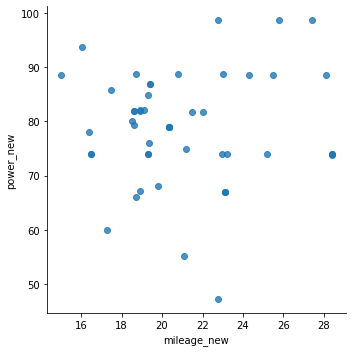

In [120]:
sn.lmplot( data = cars_df.sample(50),
           x = "mileage_new",
           y = 'power_new',
           fit_reg = False);

### Scaling the data

- Min Max Scaler
- Standard Scaler

In [92]:
from sklearn.preprocessing import MinMaxScaler

In [93]:
scaler = MinMaxScaler()

In [94]:
scaler.fit(X_train)

MinMaxScaler()

In [99]:
x_train_scaled = scaler.transform(X_train)
x_test_scaled = scaler.transform(X_test)

In [123]:
x_train_scaled.shape

(2472, 41)

### Build the model

In [109]:
from sklearn.neighbors import KNeighborsRegressor

In [116]:
knn_v1 = KNeighborsRegressor(n_neighbors=10,
                             weights='distance')

In [117]:
knn_v1.fit(x_train_scaled, y_train)

KNeighborsRegressor(n_neighbors=10, weights='distance')

### Predicting on test data and calculating accuracy

In [118]:
y_knn_pred = knn_v1.predict(x_test_scaled)

In [119]:
mse_knn = mean_squared_error(y_test, y_knn_pred)

In [120]:
np.sqrt(mse_knn)

0.9860376044076932

In [121]:
r2_score(y_test, y_knn_pred)

0.7863056864661995

### Participant Exercise: 4

Finding best params

- Iterate through a list of possible K values. For example: 3 through 15
- Build model for each k value, predict on test set and measure it's accuracy
- Print the k value for which r2 is maximum